# COVID-19 DATA  ANALYSIS

## PROBLEM STATEMENT
 The goal of this project is to predict the increase in the confirmed cases using the previous days data.To achieve this, I will be using Long Short-Term memory (LSTM).










## DATASET DESCRIPTION
### The dataset used for this project consists of  104 columns, which are described below.

1. Province/State: This tells about the Country/Region belongs to which Province/State.
2. Country/Region: This is the list of countries where the confirmed cases are.
3. Lat : Lat is a shortcut for Latitude, it gives us the latitude of the countries present.
4. Long : Long is a shortcut for Longitude, it provides us the longitude of the countries given.
5. 1/22/20 to 4/30/20 : This tells about the COVID-19 confirmed cases on their respective days.


In [ ]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Checking the versions of the packages used
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.0.5
1.18.5
0.10.1


In [ ]:
#Reading the dataset using pandas by G-drive
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid19_Confirmed_dataset.csv")
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Dropping the irrevalent columns
data = data.drop(['Lat','Long'],axis = 1)
data

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(266, 102)

In [ ]:
#Checking number of null values present in the dataset
data.isnull().sum()

Province/State    184
Country/Region      0
1/22/20             0
1/23/20             0
1/24/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 102, dtype: int64

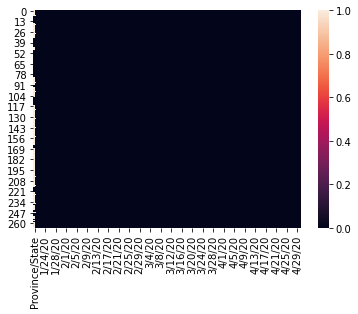

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data1 = data.groupby('Country/Region').sum()
data1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


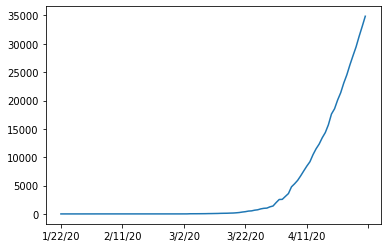

In [ ]:
data1.loc['India'].plot()

From the above plot we can clearly see that there is a constant in the COVID19 confirmed cases upto 3/22/20 , but there is a drastic increase in the cases after 4/11/20.

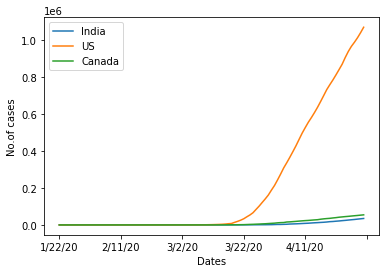

In [ ]:
#Comparing three Country cases
data1.loc['India'].plot()
data1.loc['US'].plot()
data1.loc['Canada'].plot()
plt.xlabel('Dates')
plt.ylabel('No.of cases')
plt.legend()

From the above plot we can see that the US has the highest confirmed COVID-19 cases compared to India and Canada. While comparing between India and Canada , Canada has a slightly higher number of cases than India.

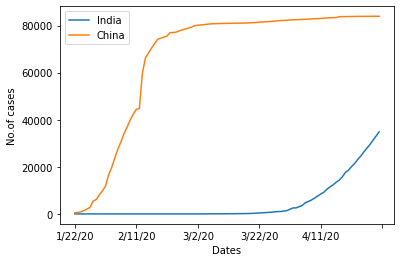

In [ ]:
##Comparing two Country cases
data1.loc['India'].plot()
data1.loc['China'].plot()
plt.xlabel('Dates')
plt.ylabel('No.of cases')
plt.legend()

The plot was drawn between India and China of their respective confirmed COVID19 cases. Through the above plot we can see that since the beginning China has had a rapid increase in cases compared to India . But then China has a constant  from 3/22/20 whereas India increases from 4/11/20.

In [ ]:
df = data[data['Country/Region']=='China'] 
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
49,Anhui,China,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,...,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,...,522,537,558,561,566,569,573,577,577,580,580,582,584,585,586,587,587,588,588,588,589,589,589,589,590,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,...,577,578,578,578,578,578,578,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,...,313,313,318,322,328,331,337,338,340,343,345,345,349,350,350,350,351,351,351,351,351,352,352,353,353,353,354,355,355,355,355,355,355,355,355,355,355,355,355,356
53,Gansu,China,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,...,136,136,136,136,136,136,136,138,138,138,138,138,138,138,138,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348,...,1413,1415,1428,1433,1448,1456,1467,1475,1484,1494,1501,1507,1514,1516,1524,1532,1533,1536,1539,1544,1548,1552,1555,1564,1566,1571,1577,1579,1580,1581,1582,1582,1585,1585,1586,1587,1587,1588,1588,1588
55,Guangxi,China,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,317,318,...,319,319,319,319,319,319,319,319,321,321,323,325,326,326,327,327,327,327,327,327,327,327,327,327,327,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


In [ ]:
df = df.groupby('Country/Region').sum()
df = pd.DataFrame(df)
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809,82883,82941,83014,83134,83213,83306,83356,83403,83760,83787,83805,83817,83853,83868,83884,83899,83909,83912,83918,83940,83944,83956


In [ ]:
df.T

Country/Region,China
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
1/26/20,2075
...,...
4/26/20,83912
4/27/20,83918
4/28/20,83940
4/29/20,83944


In [ ]:
#Using cumsum() --> cumulative sum
df = df.T.cumsum()
df

Country/Region,China
1/22/20,548
1/23/20,1191
1/24/20,2111
1/25/20,3517
1/26/20,5592
...,...
4/26/20,6351180
4/27/20,6435098
4/28/20,6519038
4/29/20,6602982


In [ ]:
df = df.iloc[14:]
df

Country/Region,China
2/5/20,137392
2/6/20,167979
2/7/20,202089
2/8/20,238903
2/9/20,278732
...,...
4/26/20,6351180
4/27/20,6435098
4/28/20,6519038
4/29/20,6602982


In [ ]:
df.columns = ['China']
print("len of the dataset::"+str(len(df)))
data = np.array(df).reshape(-1,1)
train_data = df[:len(df)-43]
test_data = df[len(df)-43:]

print(train_data.shape)
print(test_data.shape)

len of the dataset::86
(43, 1)
(43, 1)


In [ ]:
train_data

,China
2/5/20,137392
2/6/20,167979
2/7/20,202089
2/8/20,238903
2/9/20,278732
2/10/20,321086
2/11/20,365472
2/12/20,410231
2/13/20,470126
2/14/20,536484


In [ ]:
test_data

,China
3/19/20,3205778
3/20/20,3287028
3/21/20,3368333
3/22/20,3449768
3/23/20,3531266
3/24/20,3612857
3/25/20,3694518
3/26/20,3776300
3/27/20,3858197
3/28/20,3940196


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
scaled_train_data

array([[0.        ],
       [0.01023925],
       [0.02165786],
       [0.03398165],
       [0.04731474],
       [0.06149309],
       [0.07635167],
       [0.09133512],
       [0.11138546],
       [0.13359935],
       [0.15650117],
       [0.18010598],
       [0.20435387],
       [0.22919661],
       [0.25417594],
       [0.27930859],
       [0.30459958],
       [0.3303763 ],
       [0.35616005],
       [0.38201712],
       [0.40804592],
       [0.43421263],
       [0.46052463],
       [0.48694644],
       [0.51351151],
       [0.54026941],
       [0.5670956 ],
       [0.59396364],
       [0.62087352],
       [0.64783395],
       [0.67484559],
       [0.70188402],
       [0.72894019],
       [0.75600874],
       [0.78308634],
       [0.81017531],
       [0.83726797],
       [0.86436498],
       [0.8914727 ],
       [0.91858913],
       [0.9457156 ],
       [0.97285043],
       [1.        ]])

In [ ]:
scaled_test_data

array([[1.02716764],
       [1.05436675],
       [1.08158428],
       [1.10884532],
       [1.13612745],
       [1.16344071],
       [1.19077741],
       [1.21815461],
       [1.24557031],
       [1.27302016],
       [1.30051118],
       [1.32802764],
       [1.35557121],
       [1.38314224],
       [1.41073704],
       [1.43835828],
       [1.46599023],
       [1.49364194],
       [1.52131473],
       [1.54900527],
       [1.57672626],
       [1.60447204],
       [1.63223722],
       [1.66002685],
       [1.68785664],
       [1.71571288],
       [1.74360026],
       [1.77150437],
       [1.79942422],
       [1.82746357],
       [1.85551196],
       [1.88356638],
       [1.91162482],
       [1.9396953 ],
       [1.96777081],
       [1.99585168],
       [2.02393756],
       [2.05202679],
       [2.08011703],
       [2.10820928],
       [2.13630889],
       [2.16440984],
       [2.1925148 ]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(43, activation='linear', input_shape = (n_input, n_features), recurrent_dropout = 0.2))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 43)                7740      
_________________________________________________________________
dropout (Dropout)            (None, 43)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 44        
Total params: 7,784
Trainable params: 7,784
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm_model.fit_generator(generator, epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2192
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0463
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 11/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 12/100
40/40 [======================

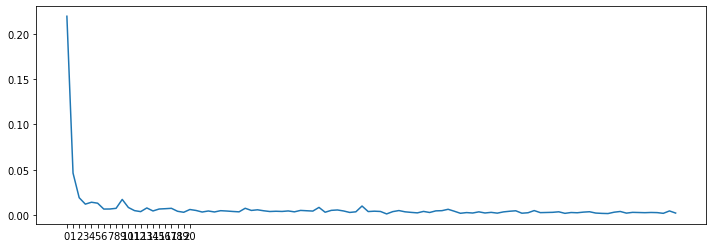

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [ ]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)
lstm_predictions_scaled

[array([1.0310249], dtype=float32),
 array([1.0590856], dtype=float32),
 array([1.0878091], dtype=float32),
 array([1.1170188], dtype=float32),
 array([1.145461], dtype=float32),
 array([1.1741046], dtype=float32),
 array([1.2026663], dtype=float32),
 array([1.2309678], dtype=float32),
 array([1.2592185], dtype=float32),
 array([1.2873015], dtype=float32),
 array([1.3151997], dtype=float32),
 array([1.3429428], dtype=float32),
 array([1.37049], dtype=float32),
 array([1.3978366], dtype=float32),
 array([1.4249777], dtype=float32),
 array([1.4518964], dtype=float32),
 array([1.4785855], dtype=float32),
 array([1.5050361], dtype=float32),
 array([1.5312378], dtype=float32),
 array([1.5571828], dtype=float32),
 array([1.5828633], dtype=float32),
 array([1.6082714], dtype=float32),
 array([1.6334], dtype=float32),
 array([1.6582426], dtype=float32),
 array([1.6827929], dtype=float32),
 array([1.7070454], dtype=float32),
 array([1.7309947], dtype=float32),
 array([1.754636], dtype=float32),

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
lstm_predictions

array([[3217300.61019135],
       [3301124.29937792],
       [3386927.93551159],
       [3474184.12624907],
       [3559147.35324693],
       [3644712.39865136],
       [3730032.79953194],
       [3814575.82196188],
       [3898967.1434207 ],
       [3982857.78045368],
       [4066196.09775376],
       [4149071.12171245],
       [4231360.70812058],
       [4313051.32496667],
       [4394128.01581693],
       [4474540.56978655],
       [4554266.90833044],
       [4633281.03574228],
       [4711551.61473227],
       [4789055.14233303],
       [4865768.82778835],
       [4941668.45591974],
       [5016733.37260437],
       [5090943.9920361 ],
       [5164281.44061995],
       [5236729.33749986],
       [5308271.3018198 ],
       [5378893.4454627 ],
       [5448581.52420592],
       [5517325.21098804],
       [5585114.53485322],
       [5651938.10042334],
       [5717789.4977982 ],
       [5782660.89265537],
       [5846548.01172805],
       [5909444.44511604],
       [5971348.05618596],
 

In [ ]:
#Adding the LSTM_Predictions for test_data
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,China,LSTM_Predictions
3/19/20,3205778,3.217301e+06
3/20/20,3287028,3.301124e+06
3/21/20,3368333,3.386928e+06
3/22/20,3449768,3.474184e+06
3/23/20,3531266,3.559147e+06
3/24/20,3612857,3.644712e+06
3/25/20,3694518,3.730033e+06
3/26/20,3776300,3.814576e+06
3/27/20,3858197,3.898967e+06
3/28/20,3940196,3.982858e+06


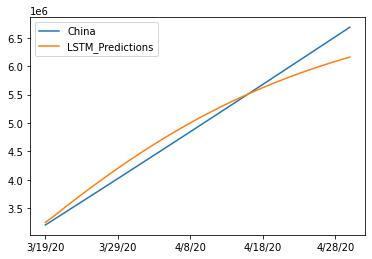

In [ ]:
test_data.plot()

In [ ]:
#Calculating the mean absolute error and mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE of LSTM Model ',mean_absolute_error(test_data['China'], test_data['LSTM_Predictions']))

print('MSE of LSTM Model ',mean_squared_error(test_data['China'], test_data['LSTM_Predictions']))

MAE of LSTM Model  89060.94445947159
MSE of LSTM Model  17598228703.872044
